- Optei por realizar uma EDA mais enxuta e focada, pois o objetivo do projeto é a modelagem e inferência da elasticidade
- Ao longo do arquivo você encontrará alguns insights

---

In [3]:
from src.data_ingestion import DataIngestion
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from dotenv import load_dotenv

from src.elasticidade import calculate_elasticity
from src.utils.outlier_detection import outlier_detection


In [4]:
load_dotenv()

ingestion_data = DataIngestion(db_params={
    "database": os.getenv("DB_NAME"),
    "user": os.getenv("DB_USER"),
    "password": os.getenv("DB_PASSWORD"),
    "host": os.getenv("DB_HOST"),
    "port": os.getenv("DB_PORT"),
})

df = ingestion_data.read_db()

C:\Users\compu\PycharmProjects\ElasticidadeMachineLearning\src\data_ingestion.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('SELECT * FROM zara', conn)


#### Objetivo:
- Elasticidade por produto e categorias
- Relação volume de vendas X preço
- Impactos de promoções
- Vendas e preço ao longo do tepo

#### Visão Geral

In [5]:
df.head()

,product_id,product_position,promotion,product_category,seasonal,sales_volume,brand,url,name,description,price,currency,scraped_at,terms,section
0,185102,Aisle,False,Clothing,False,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,2024-02-19 08:50:05.654618,jackets,MAN
1,188771,Aisle,False,Clothing,False,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,USD,2024-02-19 08:50:06.590930,jackets,MAN
2,180176,End-cap,True,Clothing,True,2220,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,129.00,USD,2024-02-19 08:50:07.301419,jackets,MAN
3,112917,Aisle,True,Clothing,True,1568,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,129.00,USD,2024-02-19 08:50:07.882922,jackets,MAN
4,192936,End-cap,False,Clothing,True,2942,Zara,https://www.zara.com/us/en/double-faced-jacket...,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,139.00,USD,2024-02-19 08:50:08.453847,jackets,MAN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   product_id        252 non-null    object        
 1   product_position  252 non-null    object        
 2   promotion         252 non-null    bool          
 3   product_category  252 non-null    object        
 4   seasonal          252 non-null    bool          
 5   sales_volume      252 non-null    int64         
 6   brand             252 non-null    object        
 7   url               252 non-null    object        
 8   name              252 non-null    object        
 9   description       252 non-null    object        
 10  price             252 non-null    float64       
 11  currency          252 non-null    object        
 12  scraped_at        252 non-null    datetime64[ns]
 13  terms             252 non-null    object        
 14  section           252 non-

In [7]:
df.describe()

,sales_volume,price,scraped_at
count,252.000000,252.000000,252
mean,1823.702381,86.252540,2024-02-19 08:57:11.426206464
min,529.000000,7.990000,2024-02-19 08:50:05.654618
25%,1243.000000,49.900000,2024-02-19 08:50:45.615702272
50%,1839.500000,79.900000,2024-02-19 08:51:39.882414592
75%,2398.750000,109.000000,2024-02-19 09:00:47.821253632
max,2989.000000,439.000000,2024-02-19 09:10:52.485772
std,697.703748,52.083205,NaN


In [8]:
df.nunique()

product_id          252
product_position      3
promotion             2
product_category      1
seasonal              2
sales_volume        234
brand                 1
url                 228
name                195
description         222
price                28
currency              1
scraped_at          229
terms                 5
section               2
dtype: int64

In [9]:
df.isnull().sum()

product_id          0
product_position    0
promotion           0
product_category    0
seasonal            0
sales_volume        0
brand               0
url                 0
name                0
description         0
price               0
currency            0
scraped_at          0
terms               0
section             0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [29]:
df.isna().sum()

product_id          0
product_position    0
promotion           0
product_category    0
seasonal            0
sales_volume        0
brand               0
url                 0
name                0
description         0
price               0
currency            0
scraped_at          0
terms               0
section             0
dtype: int64

In [32]:
df.select_dtypes(exclude=[np.number]).apply(lambda col: col.astype(str).str.contains("NaN").sum())

product_id          0
product_position    0
promotion           0
product_category    0
seasonal            0
brand               0
url                 0
name                1
description         2
currency            0
scraped_at          0
terms               0
section             0
dtype: int64

In [11]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    outliers = outlier_detection(df, col)
    print(f"\noutliers na coluna: {col}")
    print(outliers[[col]].head())



outliers na coluna: sales_volume
Empty DataFrame
Columns: [sales_volume]
Index: []

outliers na coluna: price
    price
13  439.0
22  299.0
38  349.0
61  299.0


Insights:
- Colunas com 1 variação de valor (excluí-las depois)
- Nenhum item duplicado ou vazio(null)
- url talvez não seja uma informação interessante
- calcular elasticidade associada a position do produto
- Pelo describe, o maior volume de price encontra-se no primeiro quartil, abaixo de 80/90 dolares
- formato de data pode ser melhor trabalhado
- Valores outliers em price, investigar quando tratar outliers

#### Relacionamentos

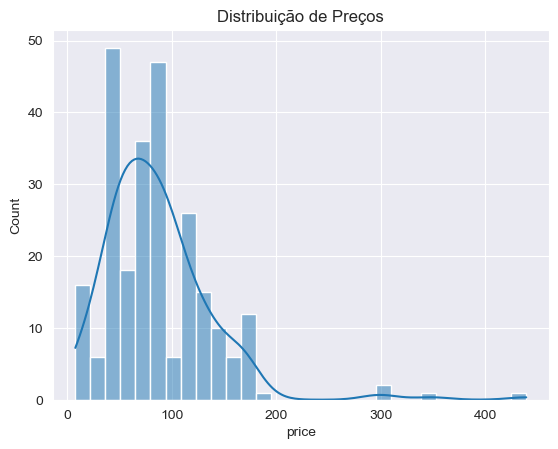

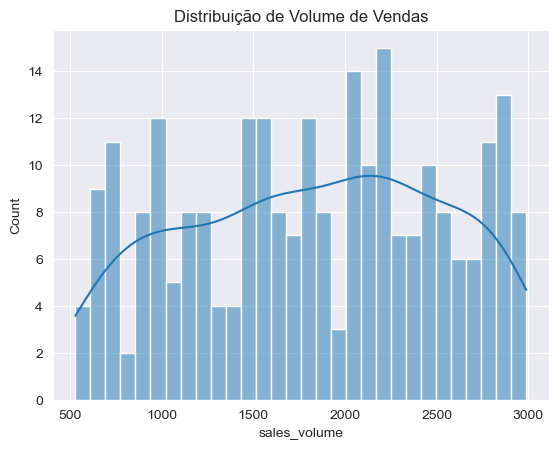

In [12]:
sns.histplot(df['price'], bins=30, kde=True)
plt.title("Distribuição de Preços")
plt.show()

sns.histplot(df['sales_volume'], bins=30, kde=True)
plt.title("Distribuição de Volume de Vendas")
plt.show()


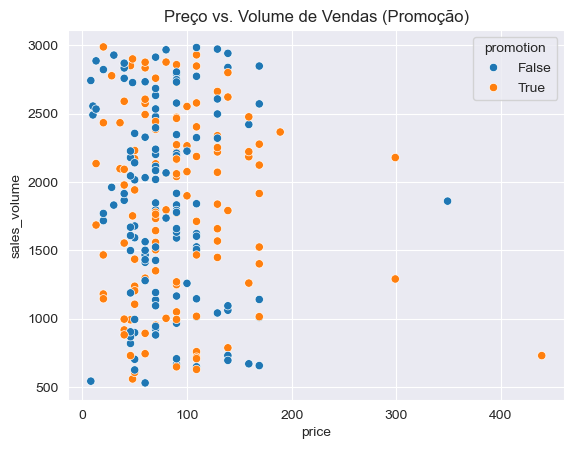

In [13]:
sns.scatterplot(data=df, x='price', y='sales_volume', hue='promotion')
plt.title("Preço vs. Volume de Vendas (Promoção)")
plt.show()


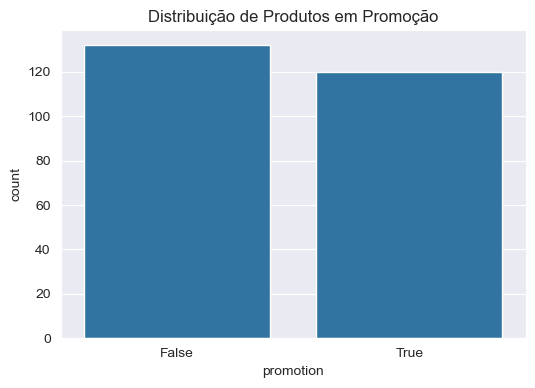

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='promotion')
plt.title("Distribuição de Produtos em Promoção")
plt.show()


In [15]:
df[['price', 'sales_volume']].corr()

,price,sales_volume
price,1.000000,-0.071359
sales_volume,-0.071359,1.000000


Insights:
- Concentração de price menor que 200
- quantidade de promotion equilibrada
- correlação não muito significativa entre price e sales_volume
- Vendas bem distribuídas entre price e sales, apesar de promotion ou não

#### Elasticidade

In [18]:
elasticity_category = calculate_elasticity(df, group_by=["promotion"])
print(elasticity_category)

      group  elasticity   p_value        r2  significant
0  (False,)   -0.084876  0.185091  0.013470        False
1   (True,)   -0.006449  0.922236  0.000081        False


In [19]:
elasticity_position = calculate_elasticity(df, group_by=["product_position"])
print(elasticity_position)

               group  elasticity   p_value        r2  significant
0           (Aisle,)   -0.074139  0.261385  0.013259        False
1         (End-cap,)    0.013108  0.890943  0.000225        False
2  (Front of Store,)   -0.049248  0.572079  0.004789        False


In [20]:
elasticity_seasonal = calculate_elasticity(df, group_by=["seasonal"])
print(elasticity_seasonal)

      group  elasticity   p_value        r2  significant
0  (False,)   -0.069480  0.339325  0.007486        False
1   (True,)   -0.033361  0.572921  0.002529        False


Insights:
- O preço tem baixo impacto e significancia nas vendas de itens em promoção
- produtos Front of Store, vendem não necessariamente por causa do preço, o preço tem impacto mas não é decisivo. Isso mostra que a posição dos produtos influencia bastante nas vendas
- a sazonalidade influencia pouco nas vendas(na tomada de descisão)

#### Investigação Outliers

In [26]:
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 13 to 61
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   product_id        4 non-null      object        
 1   product_position  4 non-null      object        
 2   promotion         4 non-null      bool          
 3   product_category  4 non-null      object        
 4   seasonal          4 non-null      bool          
 5   sales_volume      4 non-null      int64         
 6   brand             4 non-null      object        
 7   url               4 non-null      object        
 8   name              4 non-null      object        
 9   description       4 non-null      object        
 10  price             4 non-null      float64       
 11  currency          4 non-null      object        
 12  scraped_at        4 non-null      datetime64[ns]
 13  terms             4 non-null      object        
 14  section           4 non-null     

In [27]:
outliers.describe()

,sales_volume,price,scraped_at
count,4.000000,4.000000,4
mean,1514.500000,346.500000,2024-02-19 08:50:26.406570752
min,729.000000,299.000000,2024-02-19 08:50:13.771115
25%,1149.750000,299.000000,2024-02-19 08:50:17.553262848
50%,1575.000000,324.000000,2024-02-19 08:50:24.155806464
75%,1939.750000,371.500000,2024-02-19 08:50:33.009114368
max,2179.000000,439.000000,2024-02-19 08:50:43.543555
std,639.880458,66.017674,NaN


In [28]:
outliers.head()

,product_id,product_position,promotion,product_category,seasonal,sales_volume,brand,url,name,description,price,currency,scraped_at,terms,section
13,151396,Front of Store,True,Clothing,True,729,Zara,https://www.zara.com/us/en/cropped-leather-jac...,CROPPED LEATHER JACKET,Leather jacket. Cropped length. Lapel collar a...,439.0,USD,2024-02-19 08:50:13.771115,jackets,MAN
22,161909,Aisle,True,Clothing,False,1290,Zara,https://www.zara.com/us/en/leather-jacket-p054...,LEATHER JACKET,Relaxed fit jacket in leather. Spread collar a...,299.0,USD,2024-02-19 08:50:18.813979,jackets,MAN
38,114877,Aisle,False,Clothing,False,1860,Zara,https://www.zara.com/us/en/suede-jacket-p02521...,SUEDE JACKET,Jacket made of suede. Cropped length. Lapel co...,349.0,USD,2024-02-19 08:50:29.497634,jackets,MAN
61,151925,End-cap,True,Clothing,True,2179,Zara,https://www.zara.com/us/en/vintage-effect-leat...,VINTAGE EFFECT LEATHER BOMBER JACKET,NaN,299.0,USD,2024-02-19 08:50:43.543555,jackets,MAN


Insights:
- Vou manter os outliers